In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

2023-12-27 08:52:40.237361: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-27 08:52:40.287666: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-27 08:52:40.287700: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-27 08:52:40.289017: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-27 08:52:40.297190: I tensorflow/core/platform/cpu_feature_guar

In [2]:
train_datagen = ImageDataGenerator(rescale=1/255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

In [3]:
test_datagen = ImageDataGenerator(rescale=1/255)

In [4]:
train = train_datagen.flow_from_directory("../images/fruits/training_set",
                                          class_mode='binary',
                                          target_size=(64, 64))


Found 13 images belonging to 2 classes.


In [5]:
test = train_datagen.flow_from_directory("../images/fruits/test_set",
                                          class_mode='binary',
                                          target_size=(64, 64))

Found 6 images belonging to 2 classes.


### Build the Model

In [6]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3,3), input_shape=(64,64,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 8)         0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense (Dense)               (None, 16)                2

In [7]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
history = model.fit(train, epochs=20, validation_data=test)

Epoch 1/20
1/1 [==============================] - 1s 1s/step - loss: 0.6867 - accuracy: 0.5385 - val_loss: 0.6514 - val_accuracy: 0.8333
Epoch 2/20
1/1 [==============================] - 0s 204ms/step - loss: 0.6793 - accuracy: 0.3846 - val_loss: 0.6597 - val_accuracy: 0.5000
Epoch 3/20
1/1 [==============================] - 0s 187ms/step - loss: 0.6660 - accuracy: 0.6154 - val_loss: 0.6213 - val_accuracy: 0.8333
Epoch 4/20
1/1 [==============================] - 0s 197ms/step - loss: 0.6333 - accuracy: 0.8462 - val_loss: 0.6384 - val_accuracy: 0.8333
Epoch 5/20
1/1 [==============================] - 0s 190ms/step - loss: 0.6325 - accuracy: 0.7692 - val_loss: 0.6188 - val_accuracy: 0.8333
Epoch 6/20
1/1 [==============================] - 0s 197ms/step - loss: 0.5813 - accuracy: 0.7692 - val_loss: 0.6299 - val_accuracy: 0.6667
Epoch 7/20
1/1 [==============================] - 0s 209ms/step - loss: 0.5722 - accuracy: 0.6154 - val_loss: 0.6291 - val_accuracy: 0.6667
Epoch 8/20
1/1 [=======

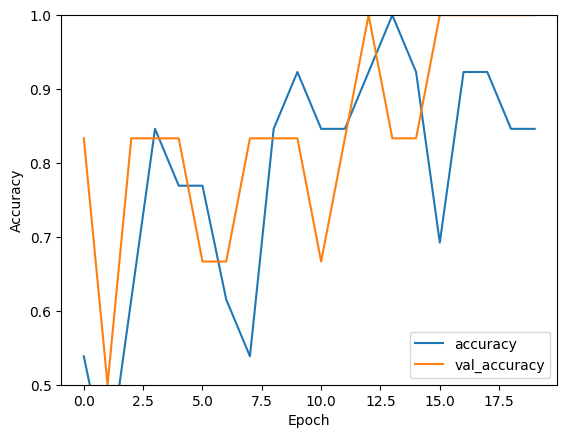

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

### Predicting the Model

In [26]:
# First Way

from PIL import Image
import numpy as np

sample_img = Image.open('../images/fruits/sample1.jpg')
sample_img = sample_img.resize((64,64))
sample_img = np.array(sample_img)
sample_img = sample_img.reshape(1,64,64,3)

model.predict(sample_img)

1/1 [==============================] - 0s 98ms/step


array([[1.]], dtype=float32)

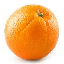

In [28]:
# Alternate Way

from tensorflow.keras.preprocessing.image import load_img, img_to_array

test_image = load_img('../images/fruits/sample1.jpg', target_size=(64,64))
test_image

In [29]:
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image.shape

(1, 64, 64, 3)

In [31]:
model.predict(test_image, verbose=0)[0][0]

1.0